In [34]:
%matplotlib inline
%load_ext autotime

import datetime
import keras
import matplotlib
import matplotlib.pyplot as pt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
import sklearn.cross_validation
import sklearn.manifold
import sklearn.metrics

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 12.7 ms


In [35]:
class MyHistory( keras.callbacks.Callback ):
    def __init__( self, m ):
        self.m = m
    def on_train_begin( self, logs={} ):
        self.weights = []
        self.bias = []
#         self.updates = []
#         self.total_loss = []
    def on_epoch_end( self, epoch, logs={} ):
        ws = []
        bs = []
        for layer in self.m.layers:
            ws = np.append( ws, layer.get_weights()[ 0 ] )
            bs = np.append( bs, layer.get_weights()[ 1 ] )
        self.weights.append( ws )
        self.bias.append( bs )
#         self.updates.append( self.m.model.train_function.updated[ 2 ] )
#         self.total_loss.append( self.m.model.train_function.updated[ 0 ] )

time: 14.8 ms


# Load data

In [36]:
df1 = pd.read_csv( './data/746Data.txt', header=None )
df1.columns = [ 0, 'cleave' ]
for i in xrange( 8 ):
    df1[ 'f%r' % ( i + 1 ) ] = df1[ 0 ].str.slice( i, i + 1 )
df1 = df1.drop( 0, axis=1 )
print df1.shape
df1.describe()

(746, 9)


,cleave
count,746.000000
mean,0.077748
std,0.997642
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


time: 25.3 ms


In [37]:
df2 = pd.read_csv( './data/1625Data.txt', header=None )
df2.columns = [ 0, 'cleave' ]
for i in xrange( 8 ):
    df2[ 'f%r' % ( i + 1 ) ] = df2[ 0 ].str.slice( i, i + 1 )
df2 = df2.drop( 0, axis=1 )
print df2.shape
df2.describe()

(1625, 9)


,cleave
count,1625.000000
mean,-0.538462
std,0.842909
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


time: 33.8 ms


In [38]:
df3 = pd.read_csv( './data/schillingData.txt', header=None )
df3.columns = [ 0, 'cleave' ]
for i in xrange( 8 ):
    df3[ 'f%r' % ( i + 1 ) ] = df3[ 0 ].str.slice( i, i + 1 )
df3 = df3.drop( 0, axis=1 )
print df3.shape
df3.describe()

(3272, 9)


,cleave
count,3272.000000
mean,-0.734719
std,0.678475
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


time: 323 ms


In [39]:
df4 = pd.read_csv( './data/impensData.txt', header=None )
df4.columns = [ 0, 'cleave' ]
for i in xrange( 8 ):
    df4[ 'f%r' % ( i + 1 ) ] = df4[ 0 ].str.slice( i, i + 1 )
df4 = df4.drop( 0, axis=1 )
print df4.shape
df4.describe()

(947, 9)


,cleave
count,947.000000
mean,-0.685322
std,0.728625
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


time: 141 ms


In [40]:
df = df1.append( df2 ).append( df3 ).append( df4 ).reset_index( drop=True )
print df.shape
df.head()

(6590, 9)


,cleave,f1,f2,f3,f4,f5,f6,f7,f8
0,-1,A,A,A,K,F,E,R,Q
1,-1,A,A,A,M,K,R,H,G
2,-1,A,A,A,M,S,S,A,I
3,-1,A,A,K,F,E,R,Q,H
4,-1,A,A,K,F,E,S,N,F


time: 72.5 ms


# Train two-class network without one-hot encoding

In [41]:
ndf = df.copy()
for i in xrange( 1, 8 + 1 ):
    ndf[ 'f%r' % i ] = ndf[ 'f%r' % i ].astype( 'category' ).cat.codes
print ndf.shape
ndf.head()

(6590, 9)


,cleave,f1,f2,f3,f4,f5,f6,f7,f8
0,-1,0,0,0,8,4,3,14,13
1,-1,0,0,0,10,8,14,6,5
2,-1,0,0,0,10,15,15,0,7
3,-1,0,0,8,4,3,14,13,6
4,-1,0,0,8,4,3,15,11,4


time: 30.7 ms


In [42]:
data_x = ndf.drop( 'cleave', axis=1 ).values
data_y = ndf.cleave.values
print data_x.shape, data_y.shape

(6590, 8) (6590,)
time: 6.16 ms


In [43]:
train_x, train_y = data_x, data_y
nn_train_x, nn_train_y = ( ( train_x - train_x.mean() ) / train_x.var() ), np.array( [ train_y == i for i in np.sort( np.unique( train_y ) ) ] ).astype( int ).T
print nn_train_x.shape, nn_train_y.shape

(6590, 8) (6590, 2)
time: 11.8 ms


In [44]:
m = keras.models.Sequential()
m.add( keras.layers.Dense( 16, input_dim=nn_train_x.shape[ 1 ], init='glorot_normal', activation='relu' ) )
m.add( keras.layers.Dropout( .5 ) )
m.add( keras.layers.Dense( 2, init='glorot_normal', activation='softmax' ) )
m.compile( loss='categorical_crossentropy', optimizer='adam' )

h = m.fit( nn_train_x, nn_train_y, batch_size=1000, nb_epoch=1000, verbose=0 )
print 'train loss: %r' % m.evaluate( nn_train_x, nn_train_y, verbose=0 )

train loss: 0.44713629840538244
time: 40.5 s


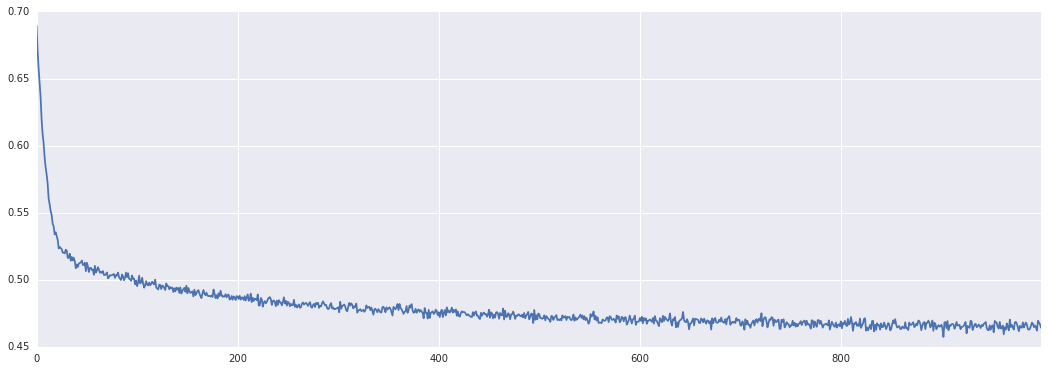

time: 231 ms


In [45]:
pd.DataFrame( h.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

In [46]:
print sklearn.metrics.classification_report( train_y, np.argmax( m.predict( nn_train_x ), axis=1 ) )

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      5230
          0       0.00      0.00      0.00         0
          1       0.87      0.11      0.19      1360

avg / total       0.18      0.02      0.04      6590

time: 197 ms


In [47]:
print sklearn.metrics.confusion_matrix( train_y, np.argmax( m.predict( nn_train_x ), axis=1 ) )

[[   0 5208   22]
 [   0    0    0]
 [   0 1211  149]]
time: 156 ms


# Train two-class network with one-hot encoding

In [193]:
hdf = pd.concat( [ pd.get_dummies( df[ 'f%r' % i ] ) for i in range( 1, 9 ) ], axis=1 ).assign( cleave=df.cleave )
print hdf.shape
hdf.head()

(6590, 161)


,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,cleave
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


time: 52.8 ms


data_x = hdf.drop( 'cleave', axis=1 ).values
data_y = hdf.cleave.values
print data_x.shape, data_y.shape

In [50]:
train_x, train_y = data_x, data_y
nn_train_x, nn_train_y = ( ( train_x - train_x.mean() ) / train_x.var() ), np.array( [ train_y == i for i in np.sort( np.unique( train_y ) ) ] ).astype( int ).T
print nn_train_x.shape, nn_train_y.shape

(6590, 160) (6590, 2)
time: 16.9 ms


In [51]:
m2 = keras.models.Sequential()
m2.add( keras.layers.Dense( 16, input_dim=nn_train_x.shape[ 1 ], init='glorot_normal', activation='relu' ) )
m2.add( keras.layers.Dropout( .5 ) )
m2.add( keras.layers.Dense( 2, init='glorot_normal', activation='softmax' ) )
m2.compile( loss='categorical_crossentropy', optimizer='adam' )

h2 = m2.fit( nn_train_x, nn_train_y, batch_size=1000, nb_epoch=1000, verbose=0 )
print 'train loss: %r' % m2.evaluate( nn_train_x, nn_train_y, verbose=0 )

train loss: 0.031341118412640506
time: 1min 14s


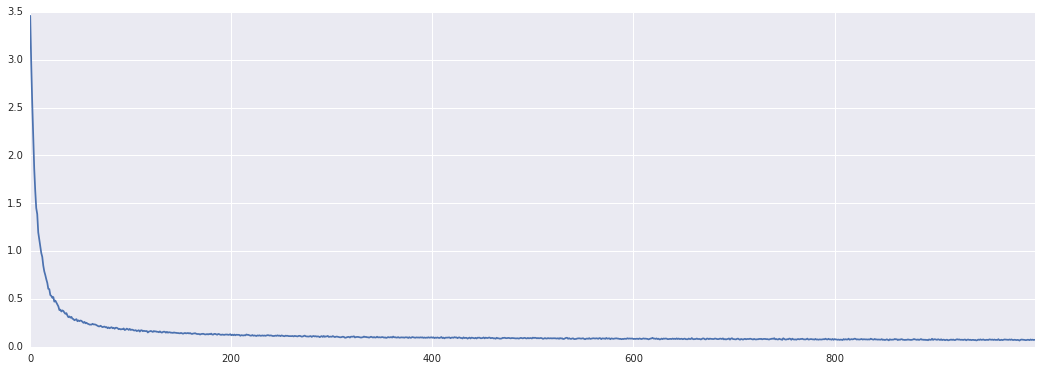

time: 217 ms


In [52]:
pd.DataFrame( h2.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

In [53]:
print sklearn.metrics.classification_report( train_y, np.argmax( m2.predict( nn_train_x ), axis=1 ) )

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      5230
          0       0.00      0.00      0.00         0
          1       0.98      0.98      0.98      1360

avg / total       0.20      0.20      0.20      6590

time: 195 ms


In [54]:
print sklearn.metrics.confusion_matrix( train_y, np.argmax( m2.predict( nn_train_x ), axis=1 ) )

[[   0 5207   23]
 [   0    0    0]
 [   0   24 1336]]
time: 183 ms


In [55]:
print sklearn.metrics.confusion_matrix( data_y, np.argmax( m2.predict( ( data_x - train_x.mean() ) / train_x.var() ), axis=1 ) )

[[   0 5207   23]
 [   0    0    0]
 [   0   24 1336]]
time: 541 ms


# Train two-class network with one-hot encoding & randomizepca

In [154]:
data_x = hdf.drop( 'cleave', axis=1 ).values
data_y = hdf.cleave.values
print data_x.shape, data_y.shape

(6590, 160) (6590,)
time: 8.3 ms


In [155]:
pca = sklearn.decomposition.RandomizedPCA( int( data_x.shape[ 1 ] * .5 ) )
pca_x = pca.fit_transform( data_x )
print pca_x.shape

(6590, 80)
time: 465 ms


In [156]:
train_x, train_y = pca_x, data_y
nn_train_x, nn_train_y = ( ( train_x - train_x.mean() ) / train_x.var() ), np.array( [ train_y == i for i in np.sort( np.unique( train_y ) ) ] ).astype( int ).T
print nn_train_x.shape, nn_train_y.shape

(6590, 80) (6590, 2)
time: 8.8 ms


In [157]:
m3 = keras.models.Sequential()
m3.add( keras.layers.Dense( 16, input_dim=nn_train_x.shape[ 1 ], init='glorot_normal', activation='relu' ) )
m3.add( keras.layers.Dropout( .5 ) )
m3.add( keras.layers.Dense( 2, init='glorot_normal', activation='softmax' ) )
m3.compile( loss='categorical_crossentropy', optimizer='adam' )

h3 = m3.fit( nn_train_x, nn_train_y, batch_size=1000, nb_epoch=1000, verbose=0 )
print 'train loss: %r' % m3.evaluate( nn_train_x, nn_train_y, verbose=0 )

train loss: 0.07409890265996219
time: 38.2 s


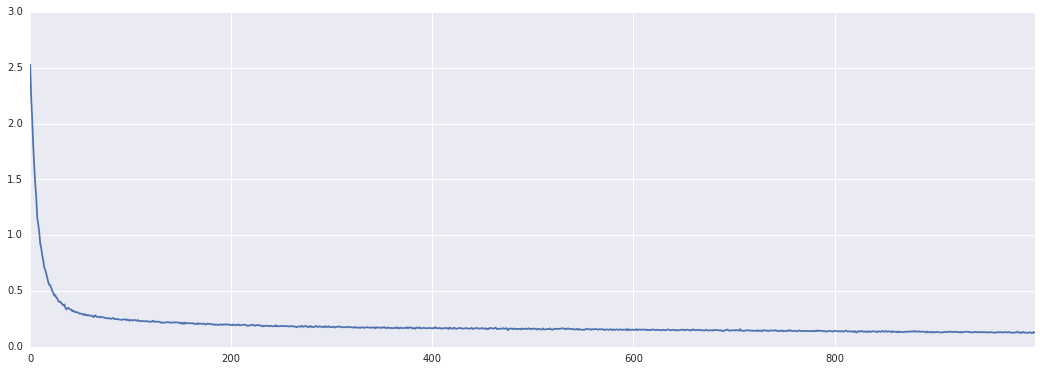

time: 327 ms


In [158]:
pd.DataFrame( h3.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

In [159]:
print sklearn.metrics.classification_report( train_y, np.argmax( m3.predict( nn_train_x ), axis=1 ) )

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      5230
          0       0.00      0.00      0.00         0
          1       0.96      0.91      0.93      1360

avg / total       0.20      0.19      0.19      6590

time: 264 ms


In [160]:
print sklearn.metrics.confusion_matrix( train_y, np.argmax( m3.predict( nn_train_x ), axis=1 ) )

[[   0 5177   53]
 [   0    0    0]
 [   0  125 1235]]
time: 222 ms


In [161]:
print sklearn.metrics.confusion_matrix( data_y, np.argmax( m3.predict( ( pca_x - train_x.mean() ) / train_x.var() ), axis=1 ) )

[[   0 5177   53]
 [   0    0    0]
 [   0  125 1235]]
time: 192 ms


# Train two-class network with one-hot encoding & dimensionality reduction

In [162]:
data_x = hdf.drop( 'cleave', axis=1 ).values
data_y = hdf.cleave.values
print data_x.shape, data_y.shape

(6590, 160) (6590,)
time: 8.79 ms


In [163]:
ica = sklearn.decomposition.FastICA( int( data_x.shape[ 1 ] * .5 ) )
ica_x = ica.fit_transform( data_x )
print ica_x.shape

(6590, 80)
time: 2.31 s


In [164]:
train_x, train_y = ica_x, data_y
nn_train_x, nn_train_y = ( ( train_x - train_x.mean() ) / train_x.var() ), np.array( [ train_y == i for i in np.sort( np.unique( train_y ) ) ] ).astype( int ).T
print nn_train_x.shape, nn_train_y.shape

(6590, 80) (6590, 2)
time: 27.3 ms


In [165]:
m4 = keras.models.Sequential()
m4.add( keras.layers.Dense( 16, input_dim=nn_train_x.shape[ 1 ], init='glorot_normal', activation='relu' ) )
m4.add( keras.layers.Dropout( .5 ) )
m4.add( keras.layers.Dense( 2, init='glorot_normal', activation='softmax' ) )
m4.compile( loss='categorical_crossentropy', optimizer='adam' )

h4 = m4.fit( nn_train_x, nn_train_y, batch_size=1000, nb_epoch=1000, verbose=0 )
print 'train loss: %r' % m4.evaluate( nn_train_x, nn_train_y, verbose=0 )
# print 'test loss:  %r' % m4.evaluate( nn_test_x, nn_test_y, verbose=0 )
# train_ps.append( m4.predict( nn_train_x ) )
# test_ps.append( m4.predict( nn_test_x ) )

train loss: 0.43346579195950874
time: 45.1 s


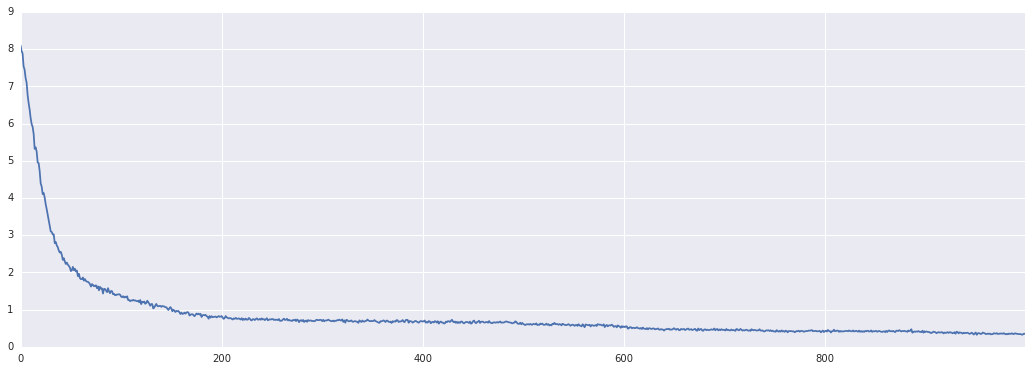

time: 233 ms


In [170]:
pd.DataFrame( h4.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

In [167]:
print sklearn.metrics.classification_report( train_y, np.argmax( m4.predict( nn_train_x ), axis=1 ) )

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      5230
          0       0.00      0.00      0.00         0
          1       0.94      0.85      0.89      1360

avg / total       0.19      0.17      0.18      6590

time: 156 ms


In [168]:
print sklearn.metrics.confusion_matrix( train_y, np.argmax( m4.predict( nn_train_x ), axis=1 ) )

[[   0 5152   78]
 [   0    0    0]
 [   0  208 1152]]
time: 127 ms


In [169]:
print sklearn.metrics.confusion_matrix( data_y, np.argmax( m4.predict( ( ica_x - train_x.mean() ) / train_x.var() ), axis=1 ) )

[[   0 5152   78]
 [   0    0    0]
 [   0  208 1152]]
time: 133 ms
